In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***predictive models for the energy use of appliances.***.


***1.Introduction:***

The understanding of the appliances energy use in buildings has been the subject of numerous
research studies, since appliances represent a significant portion of the
electrical energy demand  Regression models for energy consumption are essential tools for understanding the relationships between various variables and quantifying their impacts. These predictive models can be particularly useful in the context of electrical energy consumption in buildings, with several key applications:     
                                                             *Sizing of Photovoltaics and Energy Storage: Accurate prediction models can inform the adequate sizing of photovoltaic systems and energy storage solutions.                                                                                                   *Forecasting and Planning: These models can also be used for      forecasting future energy needs based on current trends and historical data, aiding in strategic planning for infrastructure development and resource allocation.                                                                 *Energy Management Systems: Regression models can play a crucial role in energy management systems.

**2.Problem Statment**

**Problem Statement**:                                                                 The challenge lies in designing effective prediction models to accurately forecast energy consumption while addressing the complexity of these interdependent factors.

**3.Dataset**

In this project we will be analyzing the appliance usage in the house gathered via
home sensors. All readings are taken at 10 mins intervals for 4.5 months.      
• Dataset have 19735 rows and 29 attributes.
• Data Attributes are as follows:
1. date: time year-month-day hour:minute:second
2. Appliances: energy use in Wh (Dependent variable)
3. lights: energy use of light fixtures in the house in Wh (Drop this column)
4. T1, Temperature in kitchen area, in Celsius
5. RH1: Humidity in kitchen area, in %
6. T2, Temperature: in living room area, in Celsius
7. RH2:Humidity in living room area, in %
8. T3: Temperature in laundry room area
9. RH3: Humidity in laundry room area, in %
10. T4: Temperature in office room, in Celsius
11. RH4:Humidity in office room, in %
12. T5: Temperature in bathroom, in Celsius
13. RH5: Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH6: Humidity outside the building (north side), in %
16. T7: Temperature in ironing room , in Celsius
17. RH7: Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Cel19. RH8: Humidity in teenager     room 2, in %
20. T9: Temperature in parents room, in Celsius
21. RH9: Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), inCelsius
23. Pressure (from Chievres weather station), in mm Hg
24. RHout, Humidity outside (from Chievres weather station), in %
25. Wind speed: (from Chievres weather station), in m/s26. Visibility:(from   Chievres weather station), in km
27. Tdewpoint: (from Chievres weather station), Â°C
28. rv1: Random variable 1, no dimensional
29. rv2: Random variable 2, no dimensional

**4.preprocessing**

***4.1:Bring the data***

In [2]:
import pandas as pd
# Afficher toutes les lignes et colonnes
pd.set_option('display.max_rows', None)  # Pas de limite sur les lignes
pd.set_option('display.max_columns', None)  # Pas de limite sur les colonnes

df=pd.read_csv('/content/drive/MyDrive/data/energydata_complete.csv')

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Renaming of some features, for better understanding and readability

In [3]:
#rename the columns
df.rename(columns={'T1': 'temp_kitchen', 'RH_1':'hu_Kitchen', 'T2':'temp_living_room', 'RH_2': 'hu_living', 'T3':'temp_Laundry_room',
       'RH_3':'hu_laundry', 'T4':'temp_office_room', 'RH_4':'hu_office', 'T5':'temp_bathroom', 'RH_5':'hu_bath', 'T6':'temp_build_out'
       , 'RH_6':'hu_build_out', 'T7':'temp_ironing_room', 'RH_7':'hu_ironing_room', 'T8':'temp_teen_room',
       'RH_8':'hu_teen', 'T9':'temp_parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)

In [4]:
df.head()

,date,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,hu_office,temp_bathroom,hu_bath,temp_build_out,hu_build_out,temp_ironing_room,hu_ironing_room,temp_teen_room,hu_teen,temp_parents_room,hu_parent,temp_out,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**4.2 Descriptive data:**

In [5]:
df.describe()

,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,hu_office,temp_bathroom,hu_bath,temp_build_out,hu_build_out,temp_ironing_room,hu_ironing_room,temp_teen_room,hu_teen,temp_parents_room,hu_parent,temp_out,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


From this descriptive statistics table, we can analyze various aspects of the features and target variable to better understand your dataset:

A-analyze of target:Appliances

1-Count:have 19 735 entries.

2- Mean:The average energy consumption is approximately 98 Wh.

3- Median (50th Percentile): 60Wh./The median is significantly lower than the mean, suggesting that the distribution is positively skewed.

4-Standard Deviation(std): 102.52, A large standard deviation compared to the mean indicates high variability in energy consumption.


6-Quartiles: 25th Percentile=50,25% of the data points have energy consumption below 50./50th Percentile (Median)= 60, Half of the data points have energy consumption below 60./5th Percentile= 100, 75% of the data points have energy consumption below 100./

5-Range (max - min): (max=1080)-(min=10) = 1070 A wide range also highlights variability and suggests the presence of outliers./max=1080 The highest value is much larger than the 75th percentile, indicating extreme outliers.




In [6]:
df.shape

(19735, 29)

Dataset have 19735 rows and 29 attributes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               19735 non-null  object 
 1   Appliances         19735 non-null  int64  
 2   lights             19735 non-null  int64  
 3   temp_kitchen       19735 non-null  float64
 4   hu_Kitchen         19735 non-null  float64
 5   temp_living_room   19735 non-null  float64
 6   hu_living          19735 non-null  float64
 7   temp_Laundry_room  19735 non-null  float64
 8   hu_laundry         19735 non-null  float64
 9   temp_office_room   19735 non-null  float64
 10  hu_office          19735 non-null  float64
 11  temp_bathroom      19735 non-null  float64
 12  hu_bath            19735 non-null  float64
 13  temp_build_out     19735 non-null  float64
 14  hu_build_out       19735 non-null  float64
 15  temp_ironing_room  19735 non-null  float64
 16  hu_ironing_room    197

the DataFrame Summary:                                                     

Non-Null Count:                                                                           All columns have 19735 non-null values, meaning there are no missing values in the dataset.

Numeric columns: Include continuous (float64) and discrete values (int64).

**4.3 Checking for Redundancy**





Redundancy refers to the presence of duplicate or highly correlated information across features in a dataset.(two or more features may provide the same or very similar information about the data, making them redundant.):


1- Avoid Multicollinearity: Multicollinearity occurs when two or more features are highly correlated, meaning they convey similar information.

2- Improve Model Performance:Reducing redundancy simplifies the model, which can lead to better generalization on unseen data.

3- Simplify Data and Reduce Dimensionality:High-dimensional data can be harder to work with and understand.

4- Focus on Informative Features:Models benefit from features that bring new and unique information about the target variable.(Redundant features may "dilute" the predictive power of informative features by dominating the dataset.)

5- Enhance Feature Engineering:By identifying redundancy, you can combine or transform related features into more meaningful representations



Highly Correlated Feature Pairs (Threshold > 0.95):
temp_out and temp_build_out with correlation of 0.97
rv2 and rv1 with correlation of 1.00


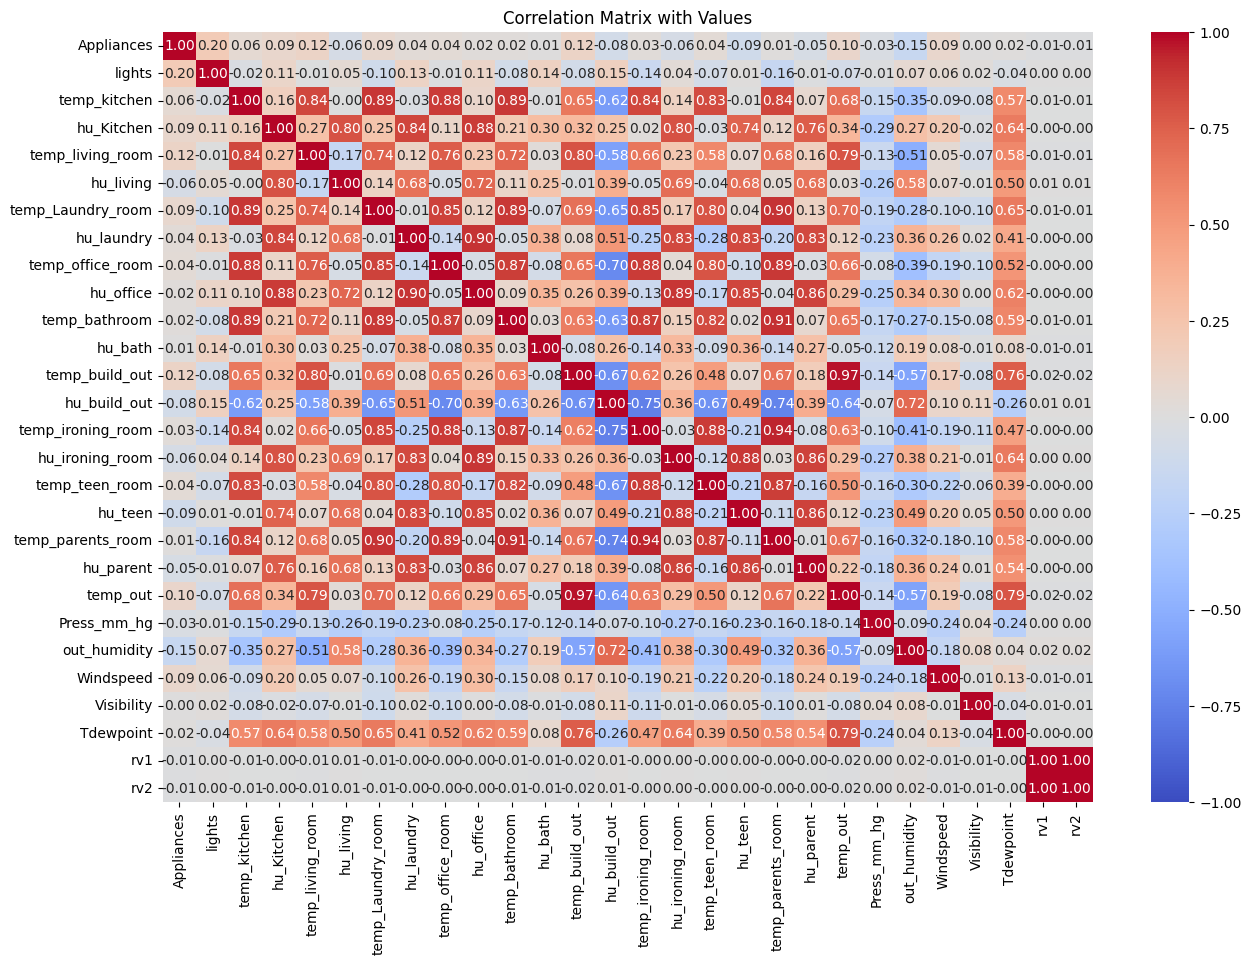


Features identified as redundant:
{'temp_out', 'rv2'}


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set a threshold for identifying redundancy
threshold = 0.95  # Adjust based on your tolerance for redundancy

# Find highly correlated pairs of features
redundant_features = set()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            redundant_features.add(corr_matrix.columns[i])

# Display the redundant feature pairs
print("Highly Correlated Feature Pairs (Threshold > 0.95):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation of {pair[2]:.2f}")

# Visualize the correlation matrix with a heatmap including correlation values
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix with Values")
plt.show()

# List of redundant features
print("\nFeatures identified as redundant:")
print(redundant_features)



using heatmap correlation matrix we can conclude that's: Features with a very high absolute correlation (e.g., >0.95) are likely to be redundant like temp_out and temp_build_out with correlation of 0.97
rv2 and rv1 with correlation of 1.00   NB/heatmap correlation matrix:Measures the linear relationship between two continuous variables.

descriptive data provides summary statistics for numerical columns, you analyze the dataset's central tendency, variability, and spread.

the more the points will be spread out from the center of the data.

**4.4 Handling Outliers & Outlier treatments:**

By using Capping tool we will Handle Outliers:

Replace values greater than the upper bound with the upper threshold.

Replace values smaller than the lower bound with the lower threshold.

**5-Data Vizualization,and the relationships between variables:**

**5-1 Target visualization:**

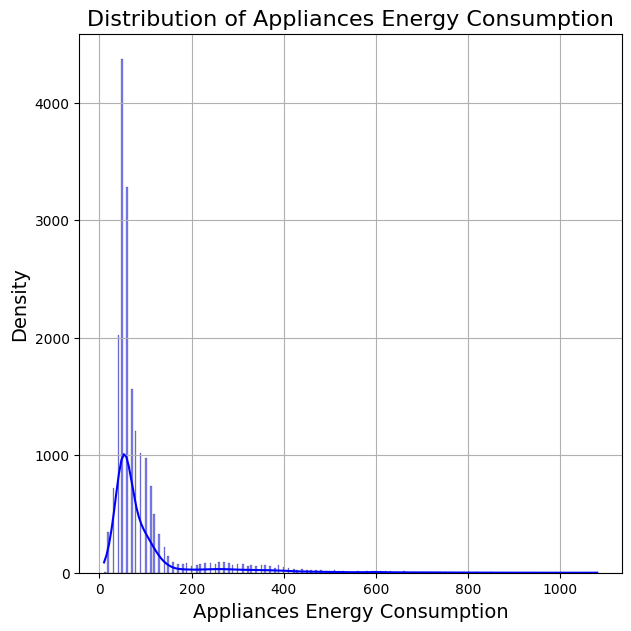

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a distribution plot for the 'Appliances' column
plt.figure(figsize=(7, 7))
sns.histplot(df['Appliances'], color='Blue', kde=True)  # kde=True adds a density curve

# Customize the plot
plt.title('Distribution of Appliances Energy Consumption', fontsize=16)
plt.xlabel('Appliances Energy Consumption', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

From the provided density plot of "Appliances" We can conclude that:                                                                                                                                                                                                                                          




* Most of the values are concentrated at the lower end of the scale (closer to 10–200 Wh).                                                                                                                                                         and There are fewer instances of higher energy consumption (above 400 Wh), The highest density appears around 50–100 Wh, suggesting that most appliances tend to consume energy in this range. The hraphe extending beyond 800–1000 indicates the presence of a few extreme consumption values, which could be** outliers** or represent **occasional high** energy usage.

Right-skewed: Indicates higher values are less frequent.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define quantile bins
quantiles = df['Appliances'].quantile([0.25, 0.5, 0.75])  # 25th, 50th, 75th percentiles
q1, q2, q3 = quantiles[0.25], quantiles[0.5], quantiles[0.75]

# Display intervals for each category
print("Appliances Energy Consumption Categories:")
print(f"Low: 0 to {q1:.2f}")
print(f"Medium: {q1:.2f} to {q2:.2f}")
print(f"High: {q2:.2f} to {q3:.2f}")
print(f"Very High: {q3:.2f} to {df['Appliances'].max():.2f}")

# Create categories
def categorize_appliances(value):
    if value <= q1:
        return "Low"
    elif q1 < value <= q2:
        return "Medium"
    elif q2 < value <= q3:
        return "High"
    else:
        return "Very High"

# Apply categorization to create a new column
df['Appliances_Category'] = df['Appliances'].apply(categorize_appliances)






Appliances Energy Consumption Categories:
Low: 0 to 50.00
Medium: 50.00 to 60.00
High: 60.00 to 100.00
Very High: 100.00 to 1080.00


<ipython-input-11-4c0472f9b31b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Appliances_Category', palette="coolwarm", order=["Low", "Medium", "High", "Very High"])


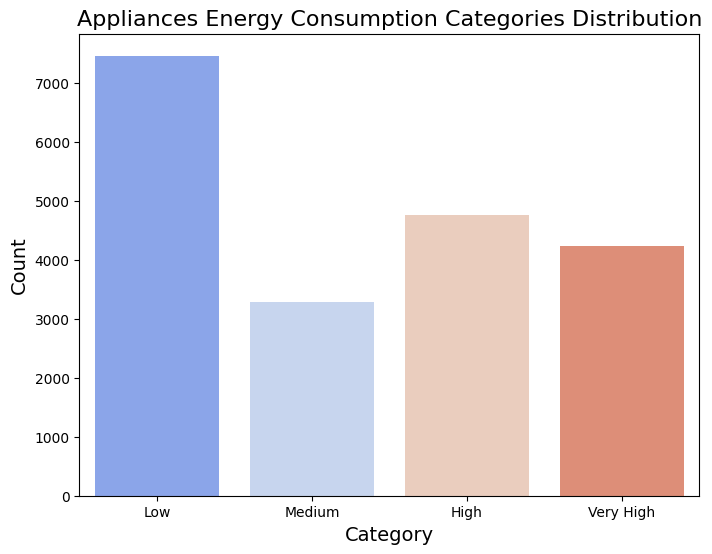

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Appliances_Category', palette="coolwarm", order=["Low", "Medium", "High", "Very High"])
plt.title("Appliances Energy Consumption Categories Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

The countplot  show us a bar chart of how many entries fall into each category.we can see that:

The majority of the Appliances consumption values fall into the "Low" category, meaning that most of the appliances consume energy at a relatively low rate.

The majority of the Appliances consumption values fall into the "Low" category, meaning that most of the appliances consume energy at a relatively low rate.

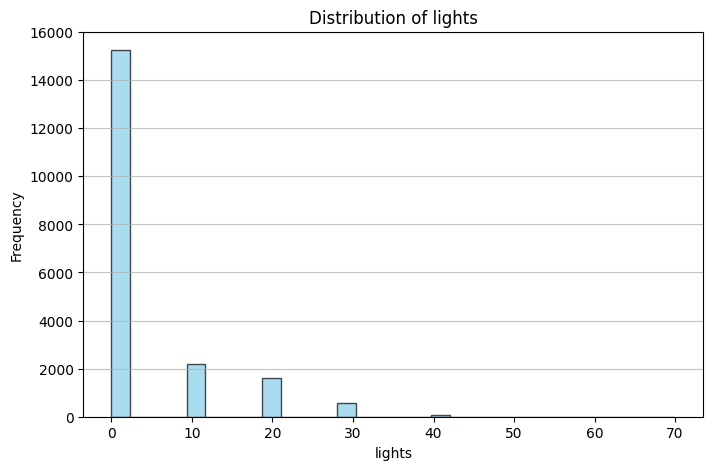

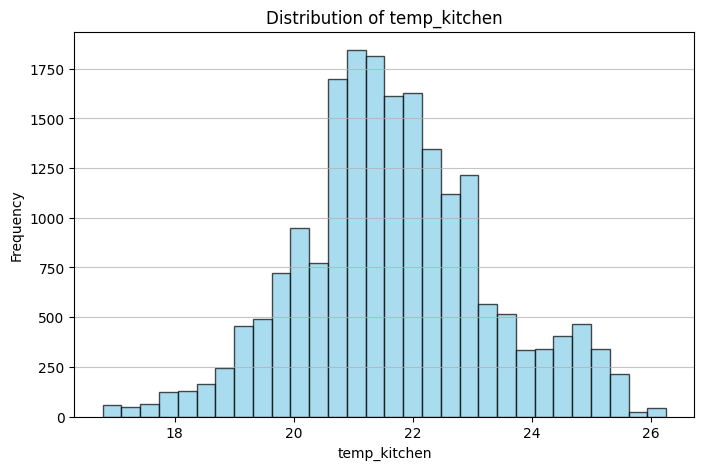

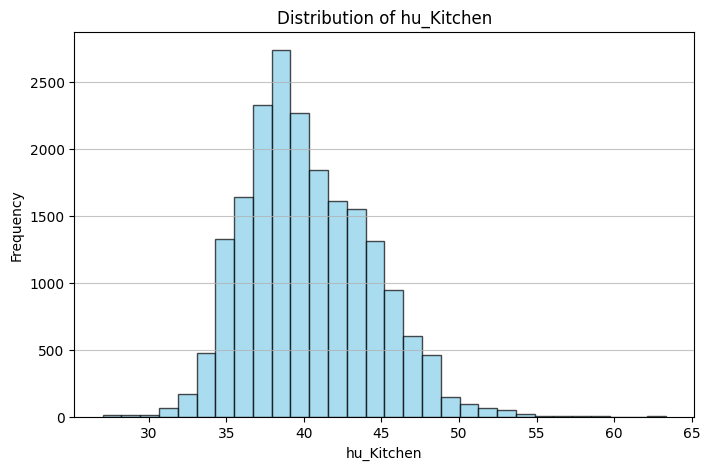

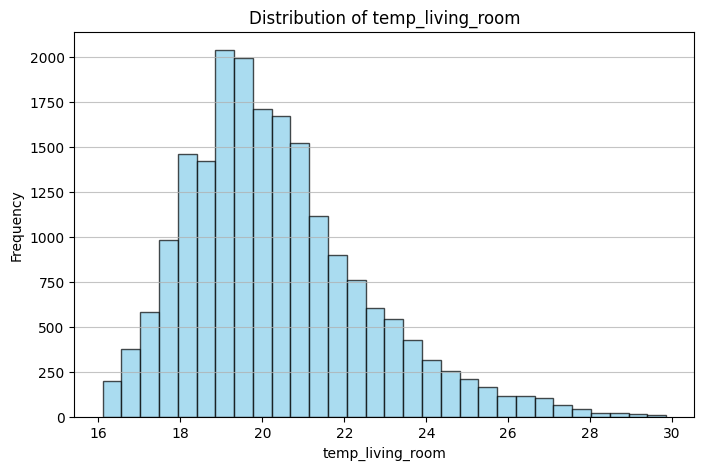

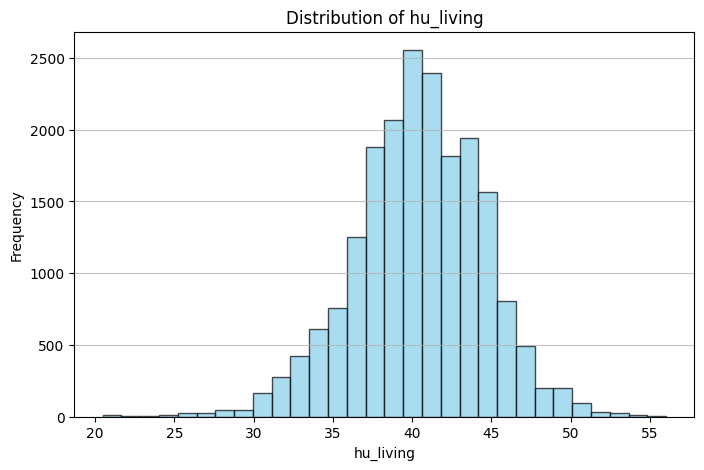

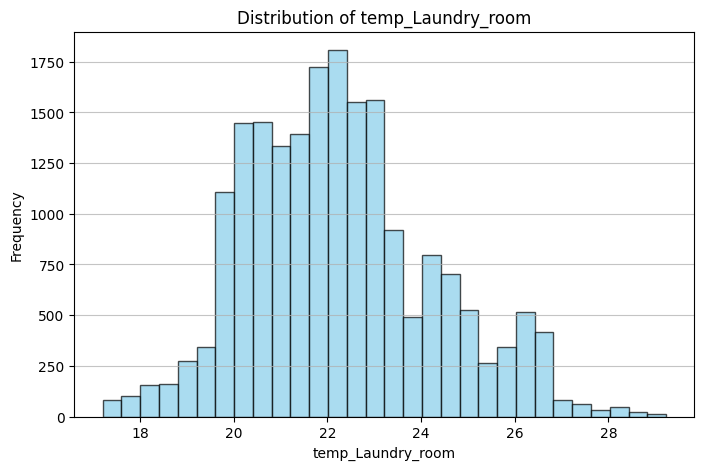

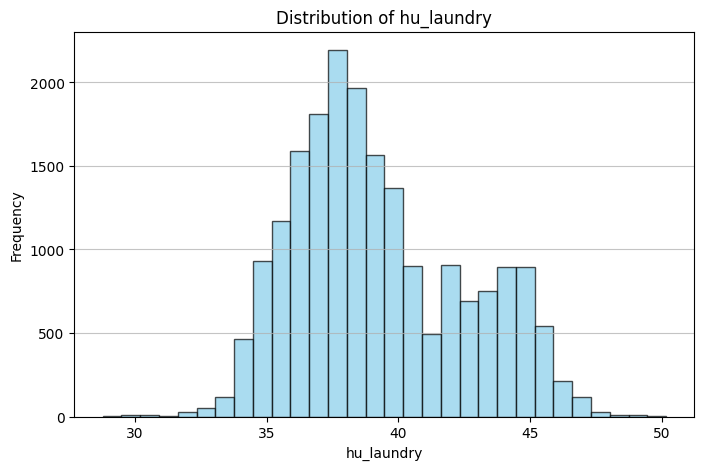

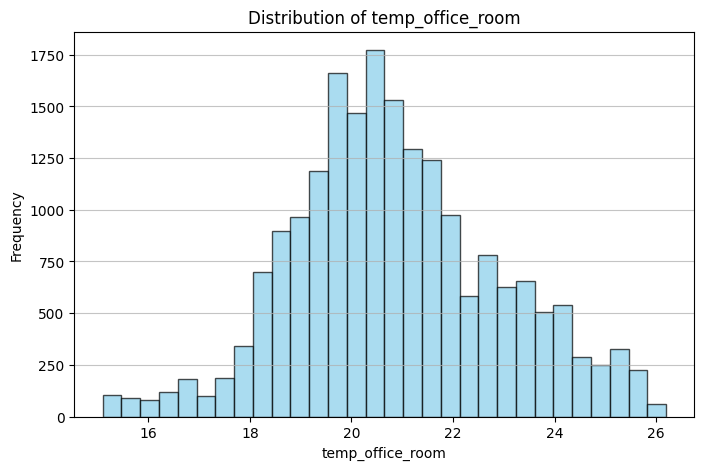

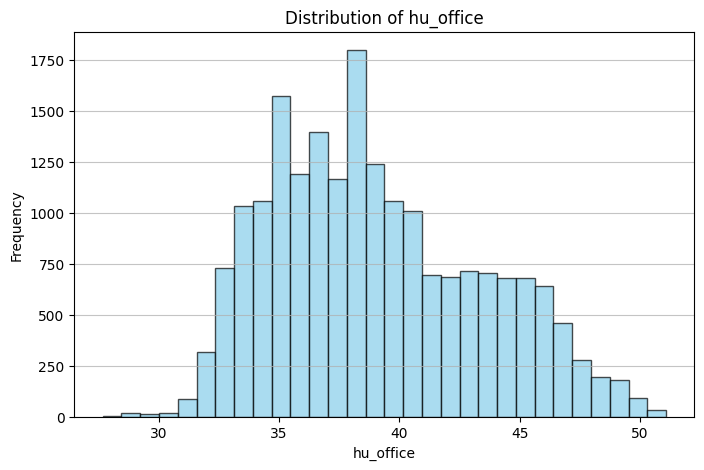

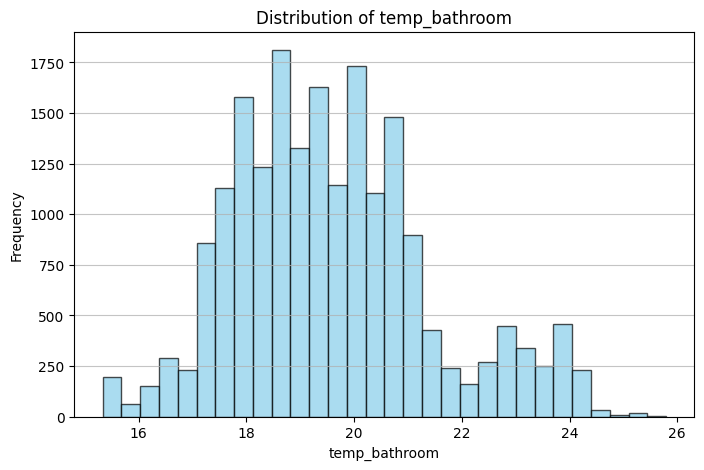

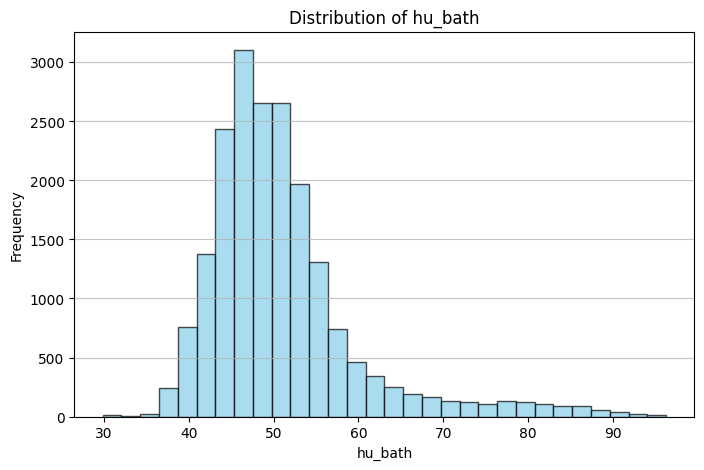

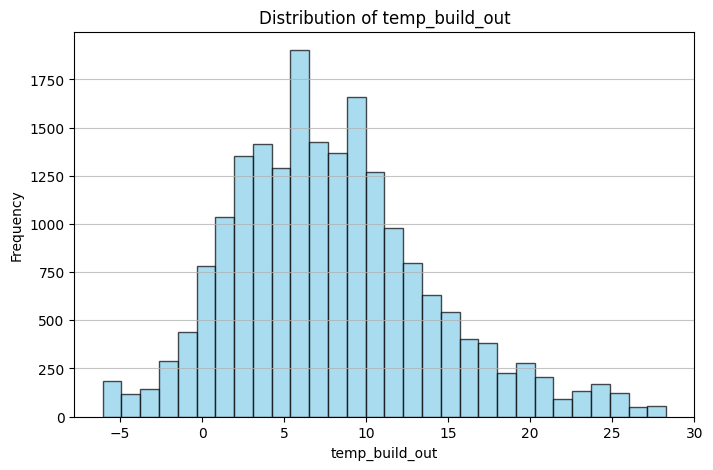

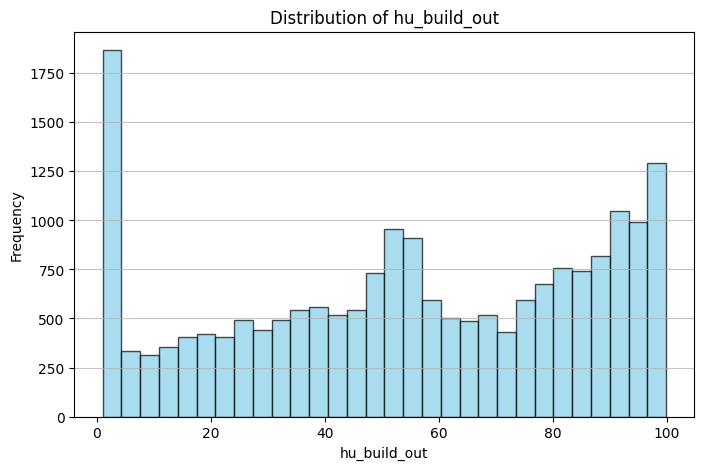

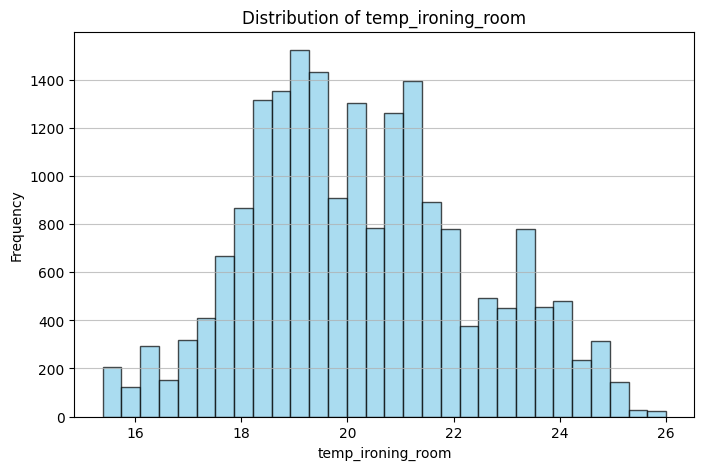

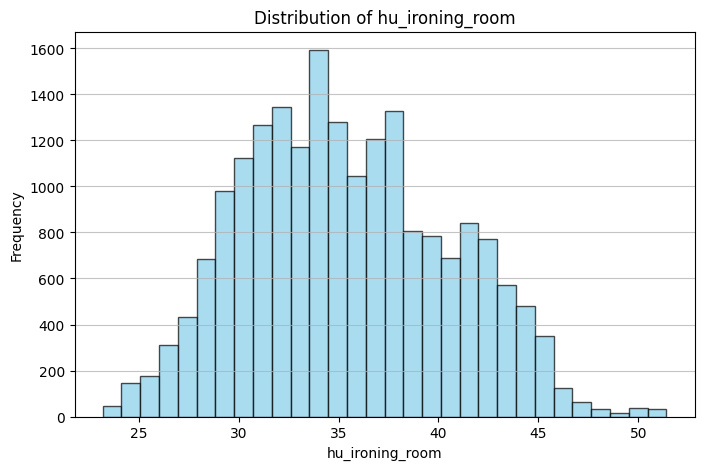

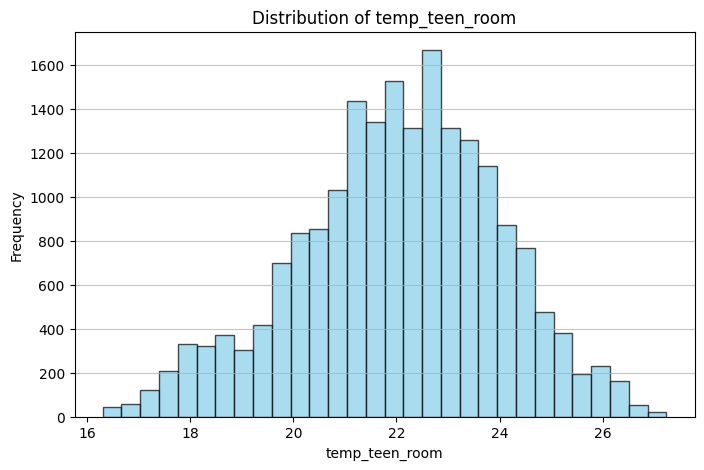

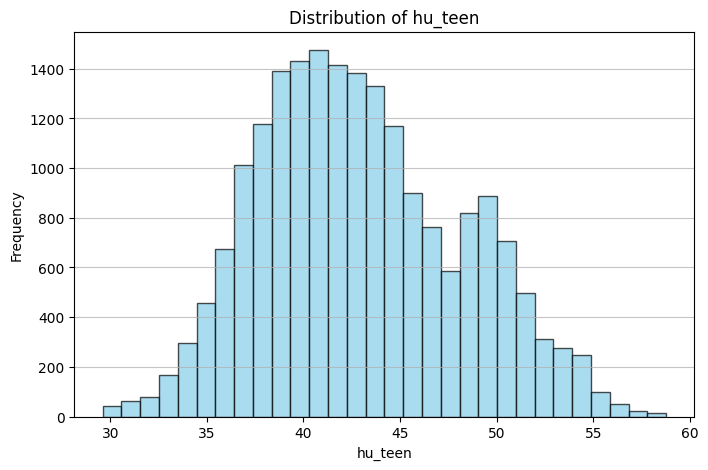

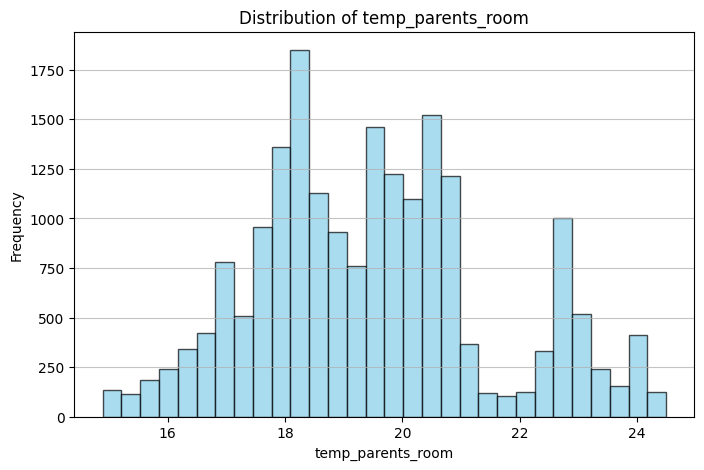

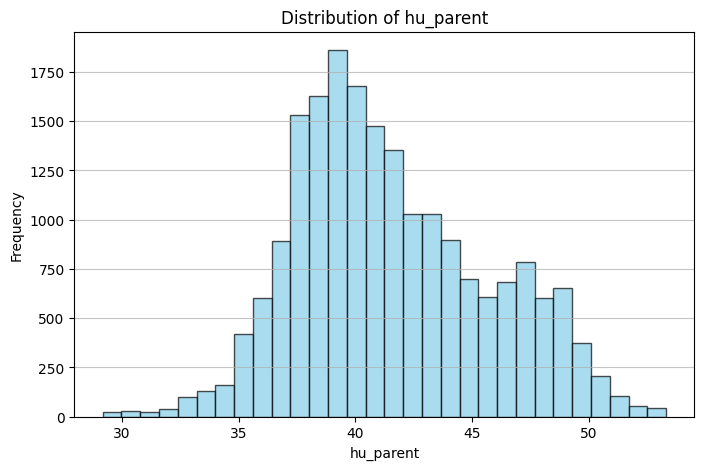

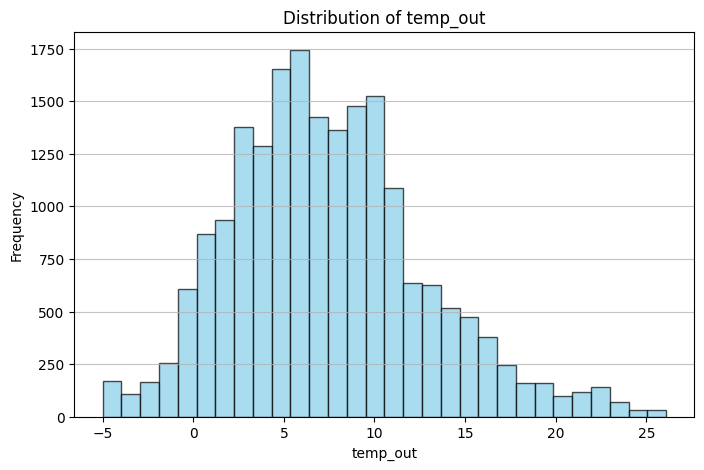

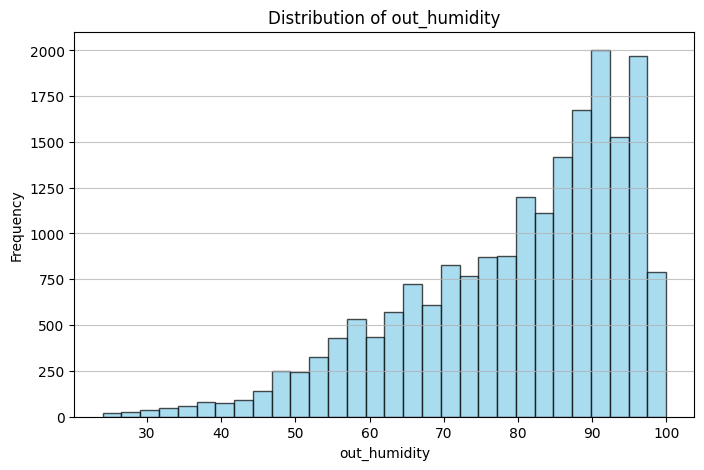

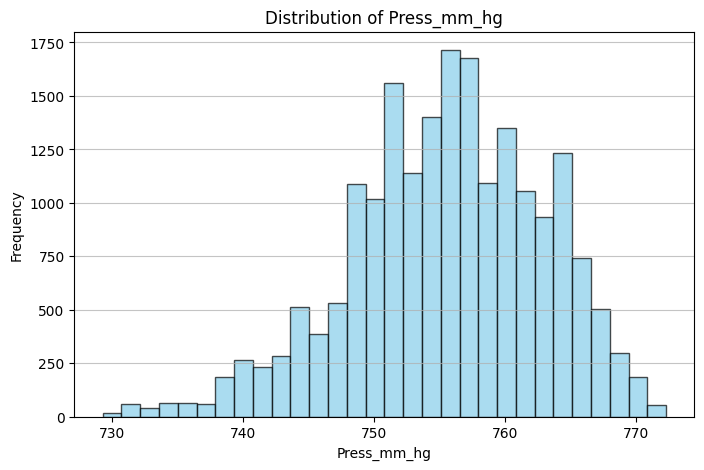

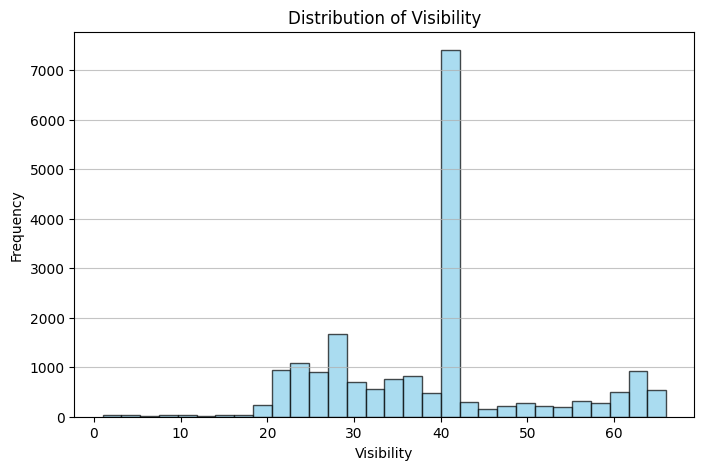

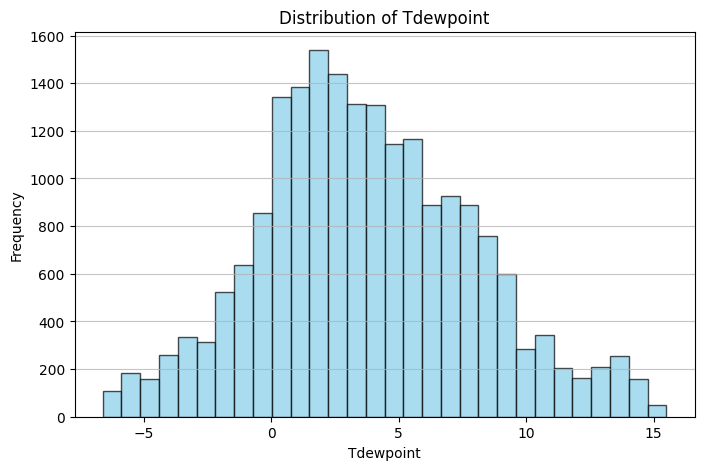

In [12]:
# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Define the features again with cleaned column names
feature_columns = [
    'lights', 'temp_kitchen', 'hu_Kitchen', 'temp_living_room', 'hu_living', 'temp_Laundry_room',
    'hu_laundry', 'temp_office_room', 'hu_office', 'temp_bathroom', 'hu_bath',
    'temp_build_out', 'hu_build_out', 'temp_ironing_room', 'hu_ironing_room',
    'temp_teen_room', 'hu_teen', 'temp_parents_room', 'hu_parent', 'temp_out', 'out_humidity', 'Press_mm_hg', 'Visibility', 'Tdewpoint'
]

# Plot histograms for all features
for feature in feature_columns:
    if feature in df.columns:  # Ensure the feature exists in the DataFrame
        plt.figure(figsize=(8, 5))
        plt.hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame!")



**Shape of the Distribution:**

hu_bath follow Right-skewed wich indicate Indicates higher values are less frequent ,out_hum follow Left-skewed  wich indicate lower values are less frequent.
the features who follow normal distribution wich indicate  that the feature is well-balanced is temp_kitchen, temp_laundry_room, temp_hu_laundry , temp_office_room, hu_office,tem_bath_room, temp_build_out, temp_ironing_room, hu_ironing_room, temp_teen_room, hu_yrrn, hu_parents, temp_out, press_mm_hg, press_hum_hg.

**Spread of the Data:**

all the features indicate Narrow Spread wich Indicates low variability; most values are close to the mean.

features who indicate skewed shape indicate outliers.



In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.rename(columns={'Visibility \t': 'Visibility'}, inplace=True)

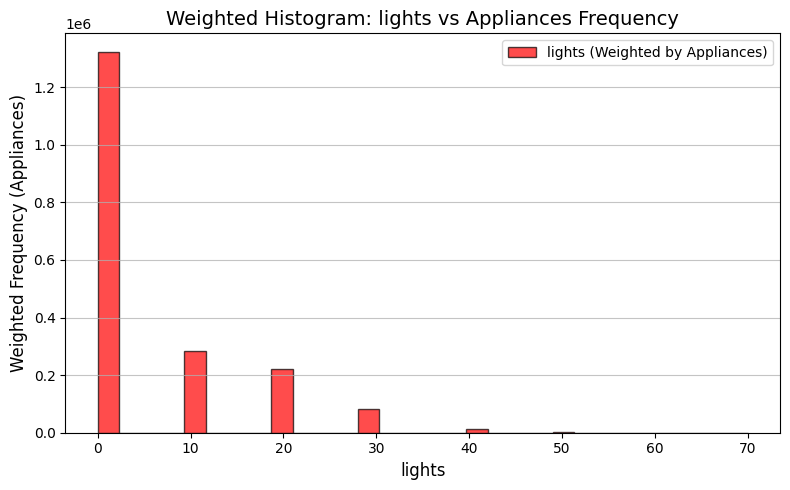

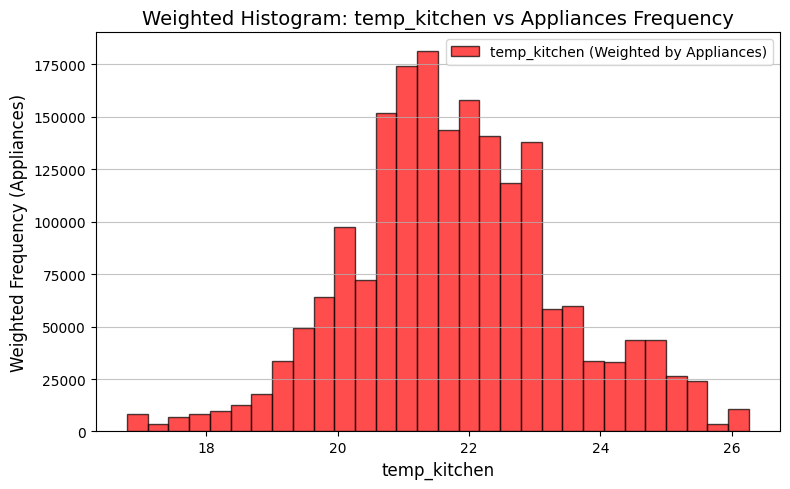

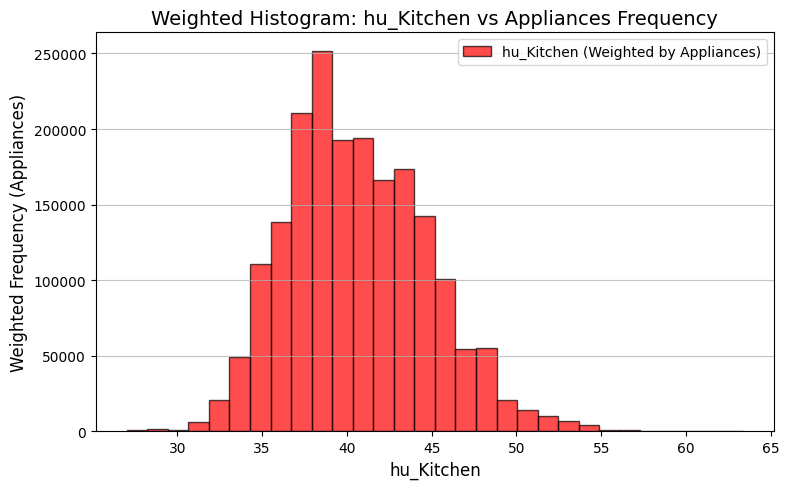

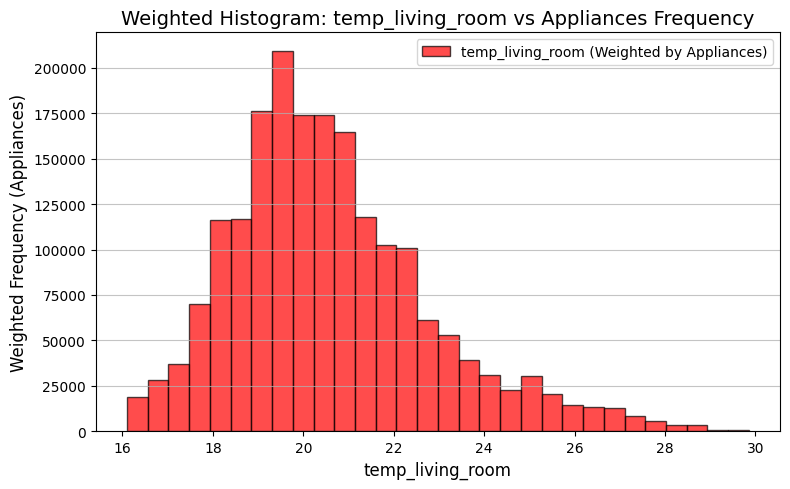

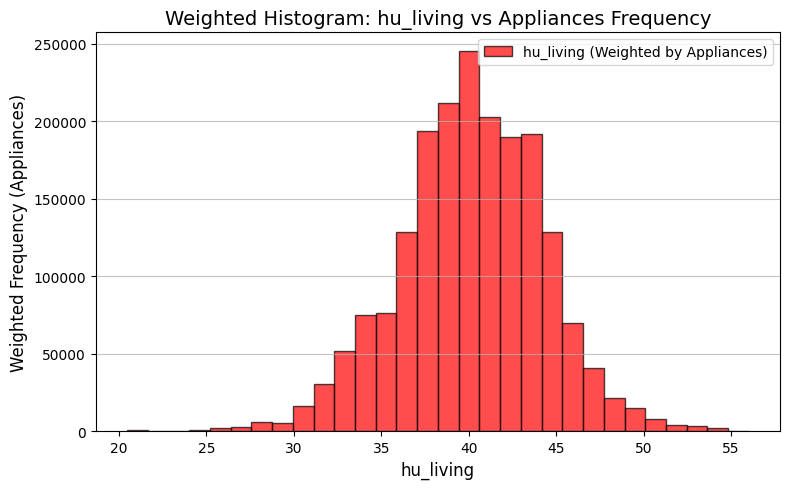

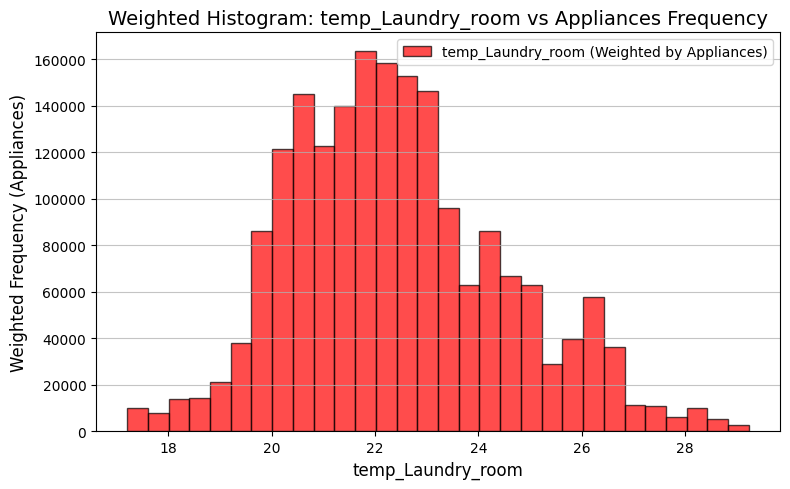

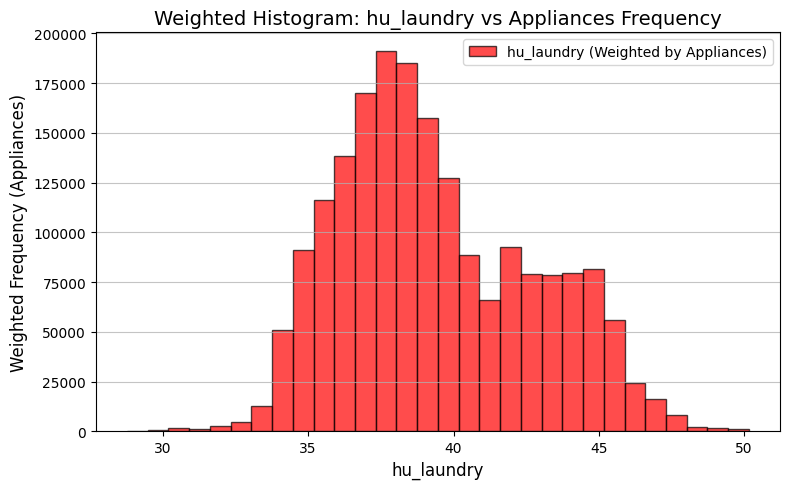

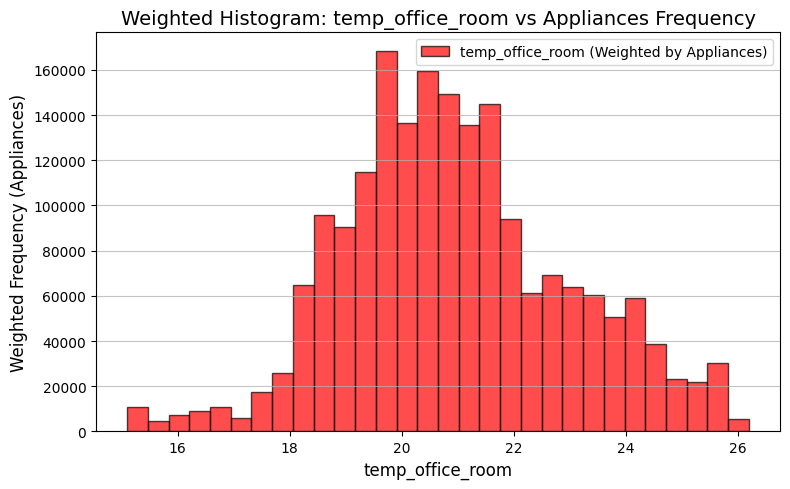

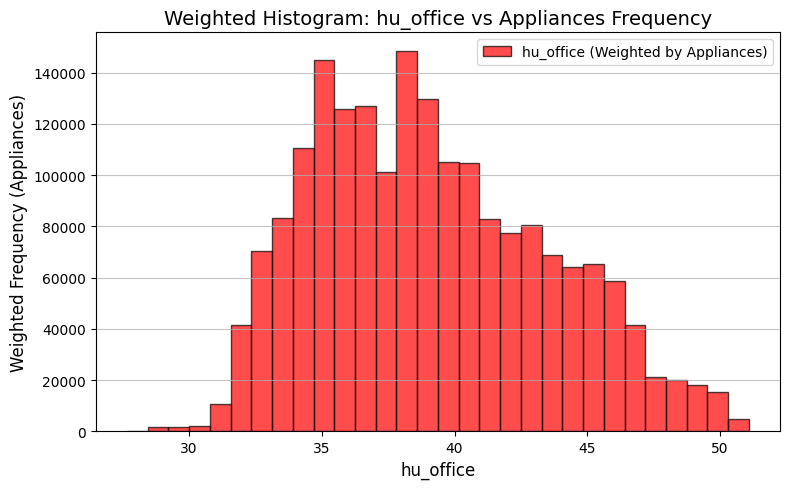

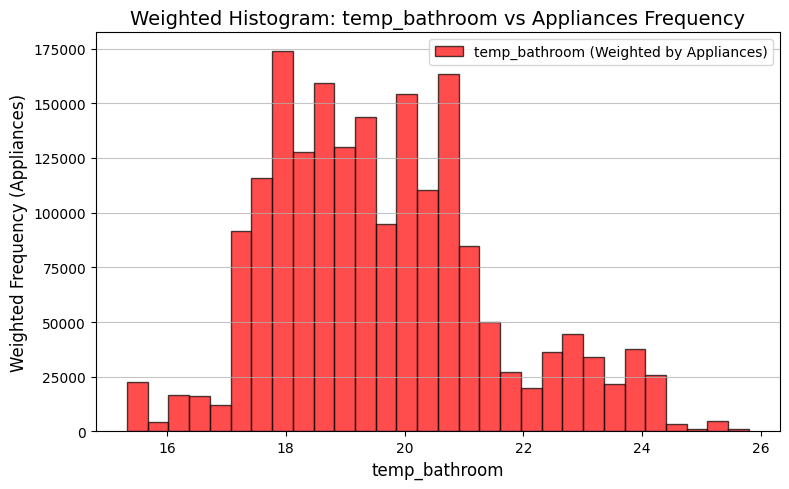

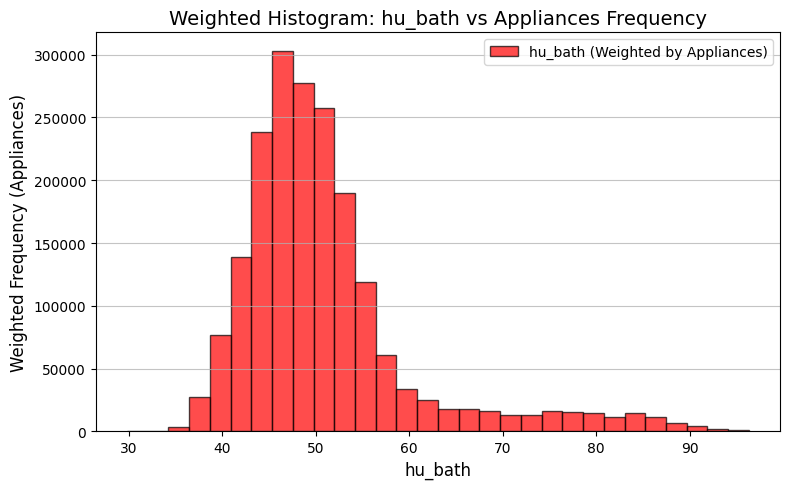

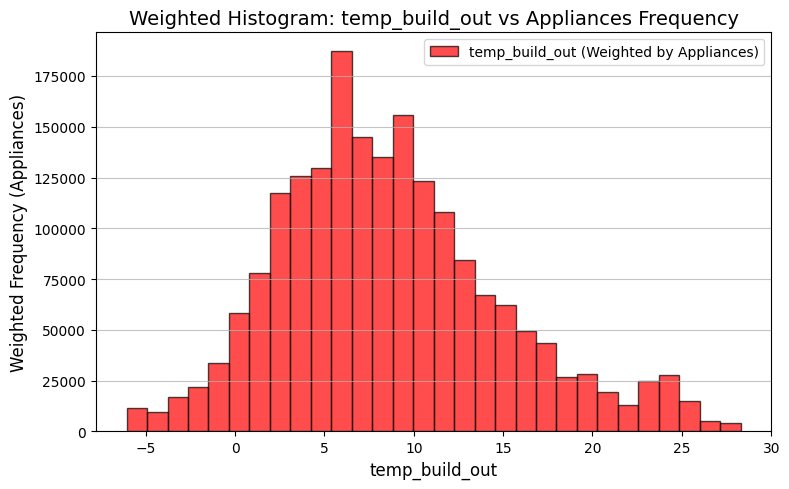

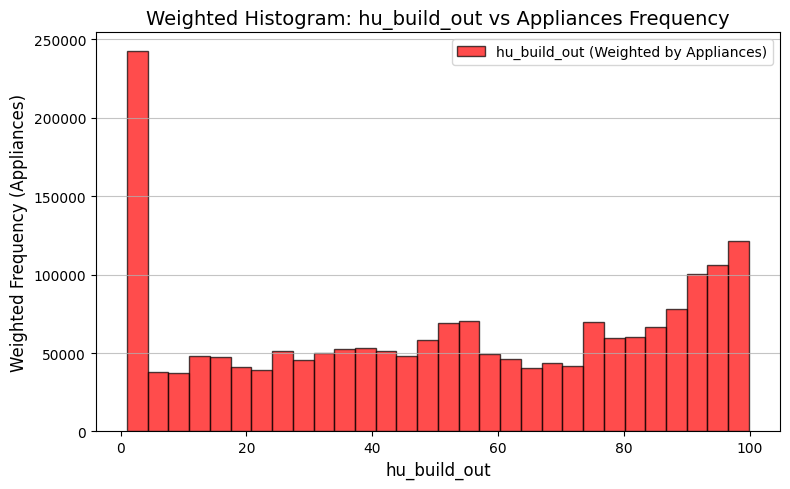

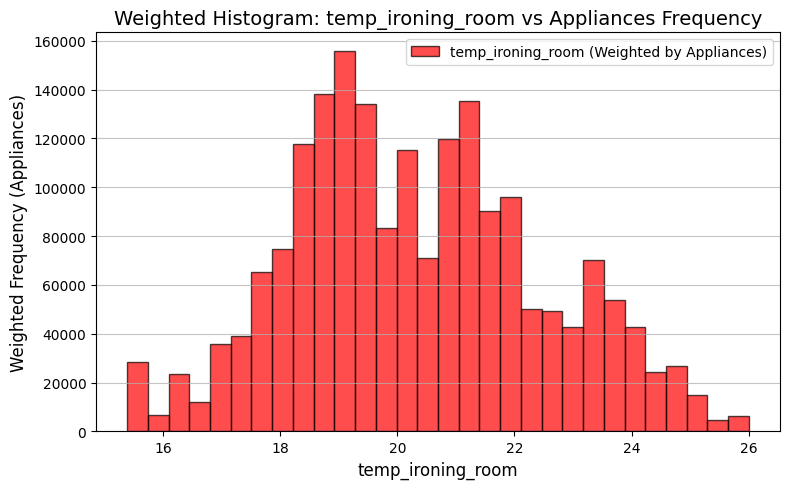

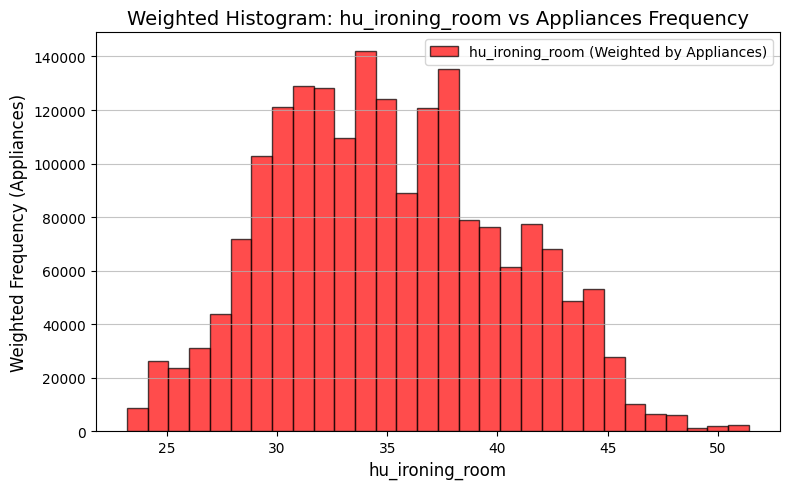

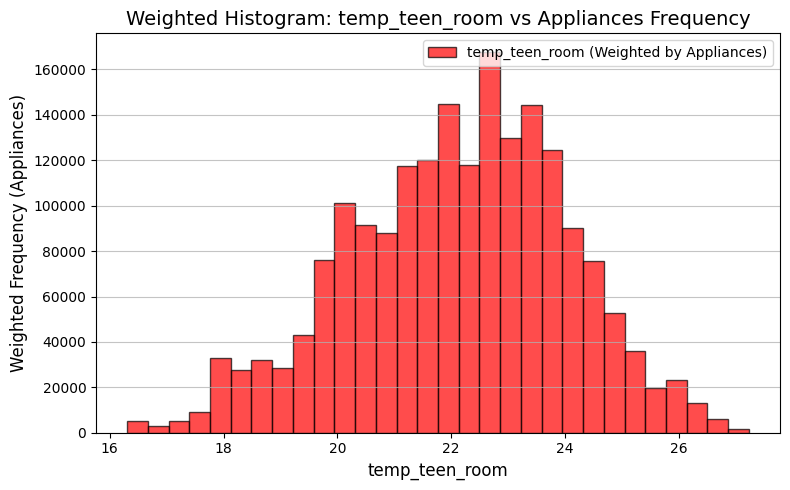

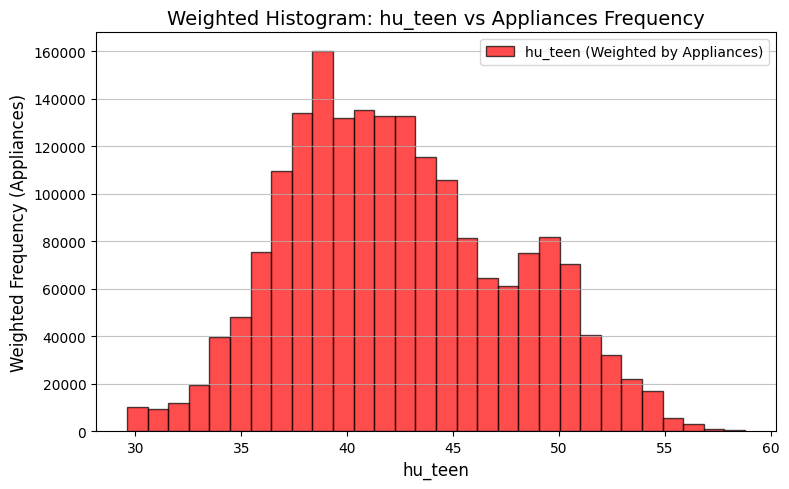

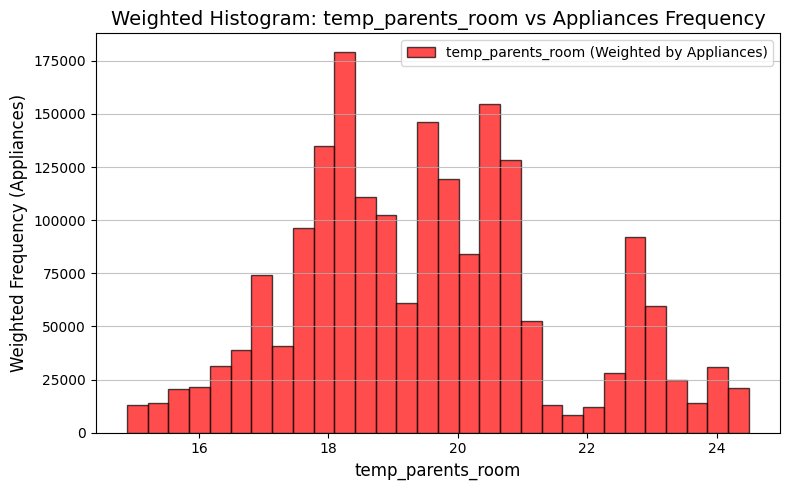

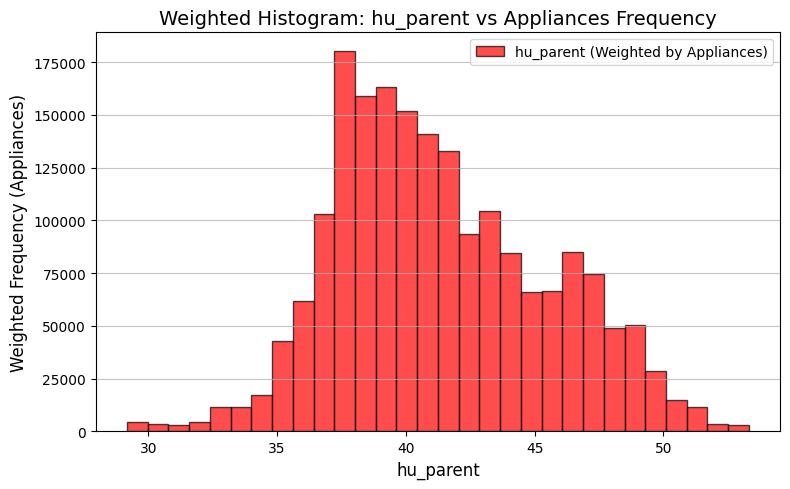

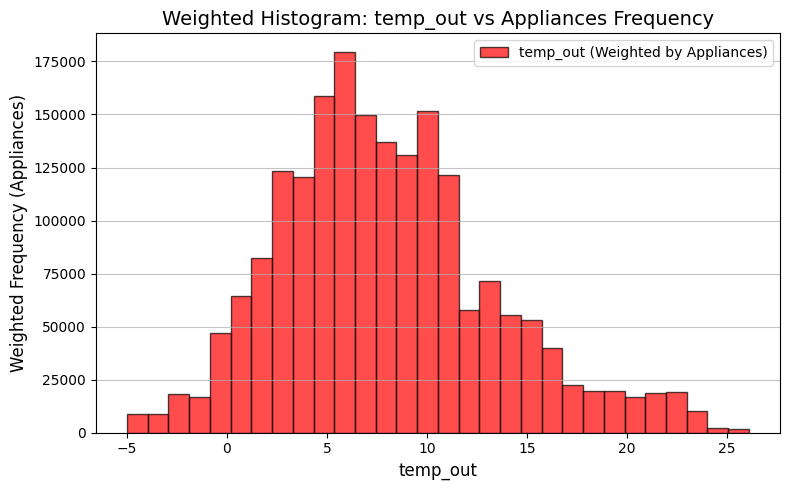

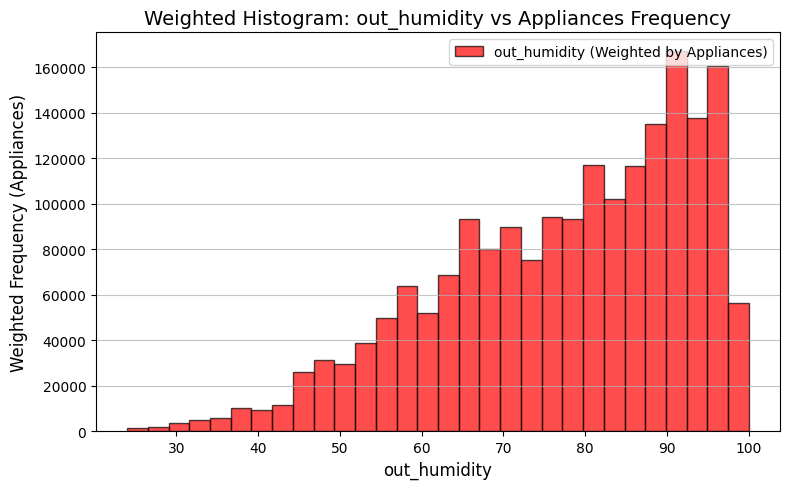

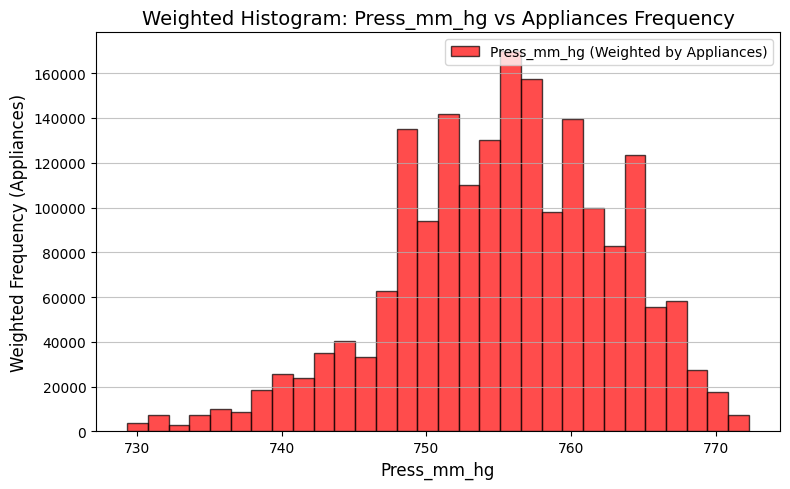

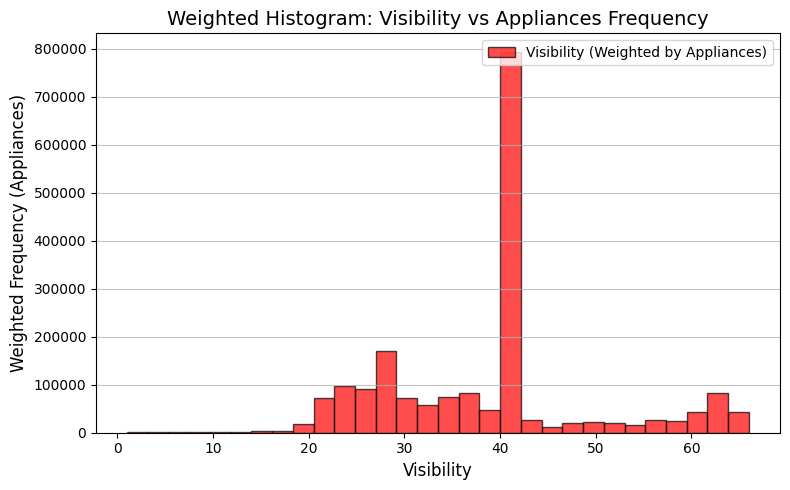

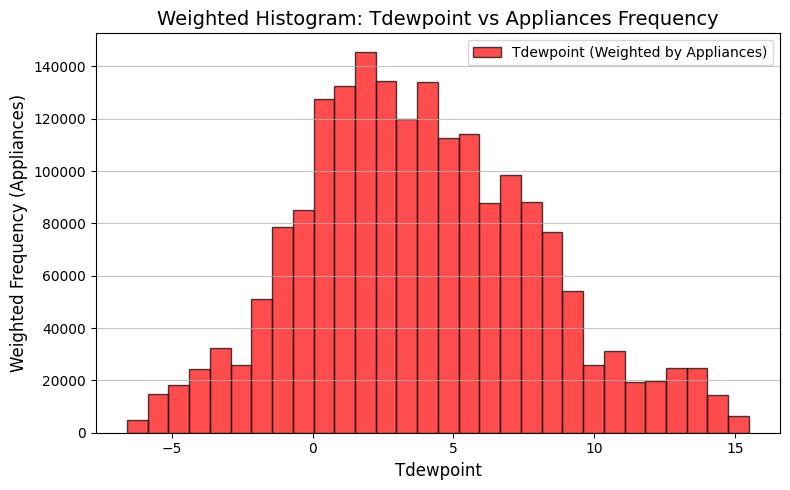

In [15]:
import matplotlib.pyplot as plt

# Clean column names to avoid KeyError
df.columns = df.columns.str.strip()

# Iterate through each feature in feature_columns
for feature in feature_columns:
    plt.figure(figsize=(8, 5))

    # Plot a histogram for the feature with weights as Appliances values
    plt.hist(
        df[feature],
        bins=30,
        weights=df['Appliances'],
        alpha=0.7,
        color='red',
        edgecolor='black',
        label=f'{feature} (Weighted by Appliances)'
    )

    # Add labels, title, and legend
    plt.title(f'Weighted Histogram: {feature} vs Appliances Frequency', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Weighted Frequency (Appliances)', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.75)

    # Show the plot
    plt.tight_layout()
    plt.show()


Interpreting and analyzing the weighted histograms generated for each feature in relation to the Appliances:

A weighted histogram means the height of the bars represents the sum of the weights (Appliances) for each bin,It helps visualize how Appliances consumption varies across the range of values for a specific feature.



In [16]:
df['lights'].value_counts()

,count
lights,
0,15252
10,2212
20,1624
30,559
40,77
50,9
70,1
60,1


In [17]:
# Calculer les pourcentages des valeurs dans la colonne 'lights'
percentage_zeros = df['lights'].value_counts(normalize=True).get(0, 0) * 100

print(f"Le pourcentage des '0' dans 'lights' est : {percentage_zeros:.2f}%")


Le pourcentage des '0' dans 'lights' est : 77.28%


In [18]:
# Dropping the 'date' column from the DataFrame
df = df.drop(columns=['date'], axis=1)

In [19]:
# Dropping the 'date' column from the DataFrame
df = df.drop(columns=['Appliances_Category' ], axis=1)

Almoste data of lights have 77.28% of 0 consumption what is mean light  will bring no informatiion to our mdel, so it's possible to drop it.

**5.2 Handling the outliers:**

In [20]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
    q1 = numeric_data.quantile(0.25)
    q3 = numeric_data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each numeric column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each numeric column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each numeric column and count the number of outliers
    outliers_count = (numeric_data < lower_bound) | (numeric_data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

# Apply the function to your DataFrame
outliers_per_column = find_outliers_iqr(df)

# Print the number of outliers per column, sorted in descending order
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending=False))


Number of outliers per column:
lights               4483
Visibility           2522
Appliances           2138
hu_bath              1330
temp_living_room      546
temp_kitchen          515
temp_build_out        515
temp_out              436
out_humidity          239
hu_living             235
Press_mm_hg           219
temp_Laundry_room     217
Windspeed             214
temp_office_room      186
temp_bathroom         179
hu_Kitchen            146
temp_teen_room         71
hu_ironing_room        42
hu_parent              21
hu_teen                17
hu_laundry             15
Tdewpoint              10
temp_ironing_room       2
hu_office               0
temp_parents_room       0
hu_build_out            0
rv1                     0
rv2                     0
dtype: int64


In [21]:
import numpy as np

# Iterate through only numeric columns
for ftr in df.select_dtypes(include=[np.number]).columns:
    print(ftr, '\n')

    # Calculate percentiles and IQR
    q_25 = np.percentile(df[ftr], 25)
    q_75 = np.percentile(df[ftr], 75)
    iqr = q_75 - q_25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower = q_25 - cut_off
    upper = q_75 + cut_off
    print(f"\nLower = {lower} and Upper = {upper} \n")

    # Identify outliers
    outliers = df[(df[ftr] < lower) | (df[ftr] > upper)]
    print('Identified outliers: %d' % len(outliers))

    # Remove or cap outliers by modifying the DataFrame
    if len(outliers) != 0:
        df[ftr] = df[ftr].apply(lambda x: upper if x > upper else (lower if x < lower else x))

# After processing, you can check the DataFrame
print("\nDataFrame after outlier treatment:")
print(df.describe())


Appliances 

Percentiles: 25th=50.000, 75th=100.000, IQR=50.000

Lower = -25.0 and Upper = 175.0 

Identified outliers: 2138
lights 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

Lower = 0.0 and Upper = 0.0 

Identified outliers: 4483
temp_kitchen 

Percentiles: 25th=20.760, 75th=22.600, IQR=1.840

Lower = 18.0 and Upper = 25.36 

Identified outliers: 515
hu_Kitchen 

Percentiles: 25th=37.333, 75th=43.067, IQR=5.733

Lower = 28.733333333333185 and Upper = 51.666666666666806 

Identified outliers: 146
temp_living_room 

Percentiles: 25th=18.790, 75th=21.500, IQR=2.710

Lower = 14.724999999999998 and Upper = 25.565 

Identified outliers: 546
hu_living 

Percentiles: 25th=37.900, 75th=43.260, IQR=5.360

Lower = 29.86 and Upper = 51.3 

Identified outliers: 235
temp_Laundry_room 

Percentiles: 25th=20.790, 75th=23.290, IQR=2.500

Lower = 17.04 and Upper = 27.04 

Identified outliers: 217
hu_laundry 

Percentiles: 25th=36.900, 75th=41.760, IQR=4.860

Lower = 29.61 and Upper = 49.05 

Ide

In the provided code, outliers are not dropped; instead, they are replaced with the calculated bounds (lower or upper). This means that any values identified as outliers are modified to be equal to the lower bound if they are below it, or to the upper bound if they are above it, No Dropping: The original outlier values are not removed from the DataFrame; they are simply adjusted.               



By using Capping tool we will Handle Outliers:

Replace values greater than the upper bound with the upper threshold.

Replace values smaller than the lower bound with the lower threshold.


In [22]:
df.shape

(19735, 28)

In [23]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Charger le dataset (remplacez par votre propre dataset)
# df = pd.read_csv('your_dataset.csv')

# Vérifier que la colonne cible existe
if 'Appliances' not in df.columns:
    raise ValueError("La colonne 'Appliances' est absente du dataset.")

# Extraire les colonnes à utiliser comme features
listfeature = df.columns.drop('Appliances').tolist()

dfresult = {}  # Pour stocker les résultats finaux

for feature in listfeature:
    # Ajouter les features incrémentalement
    X = df[listfeature[:listfeature.index(feature) + 1]]  # Features
    y = df[['Appliances']]  # Target (DataFrame pour compatibilité avec MinMaxScaler)

    # Initialiser les scalers
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # Normaliser les données
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    # Modèle Extra Trees Regressor
    et_model = ExtraTreesRegressor(random_state=42, max_depth=20, min_samples_split=2, n_estimators=200)
    et_model.fit(X_train, y_train.ravel())

    # Prédictions du modèle Extra Trees
    y_pred_scaled = et_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_original = scaler_y.inverse_transform(y_test)

    # Calcul des erreurs absolues
    absolute_errors = np.abs(y_test_original - y_pred)

    # Déterminer les indices des grandes erreurs
    threshold = np.percentile(absolute_errors, 80)
    indices_with_high_error = np.where(absolute_errors >= threshold)[0]

    # Extrait les exemples avec des erreurs élevées
    X_train_high_error = X_test[indices_with_high_error]
    y_train_high_error = y_test[indices_with_high_error]

    # Modèle Random Forest pour corriger les erreurs
    rf_model = RandomForestRegressor(random_state=42, max_depth=20, min_samples_split=2, n_estimators=200)
    rf_model.fit(X_train_high_error, y_train_high_error.ravel())

    # Prédictions corrigées avec Random Forest
    y_rf_scaled = rf_model.predict(X_train_high_error)
    y_rf_corrected = scaler_y.inverse_transform(y_rf_scaled.reshape(-1, 1))

    # Remplacer les prédictions avec erreurs par les corrections
    y_pred_combined = y_pred.copy()
    y_pred_combined[indices_with_high_error] = y_rf_corrected

    # Calculer les métriques pour chaque modèle
    rmse_et = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2_et = r2_score(y_test_original, y_pred)
    mae_et = mean_absolute_error(y_test_original, y_pred)

    rmse_rf = np.sqrt(mean_squared_error(y_test_original[indices_with_high_error], y_rf_corrected))
    r2_rf = r2_score(y_test_original[indices_with_high_error], y_rf_corrected)
    mae_rf = mean_absolute_error(y_test_original[indices_with_high_error], y_rf_corrected)

    rmse_combined = np.sqrt(mean_squared_error(y_test_original, y_pred_combined))
    r2_combined = r2_score(y_test_original, y_pred_combined)
    mae_combined = mean_absolute_error(y_test_original, y_pred_combined)

    # Stocker les résultats pour la combinaison
    dfresult[feature] = {'R²': r2_combined, 'RMSE': rmse_combined, 'MAE': mae_combined}

    # Afficher les résultats pour chaque itération
    print(f"\n=== Résultats pour les features: {listfeature[:listfeature.index(feature) + 1]} ===")
    print(f"Extra Trees - RMSE: {rmse_et:.2f}, MAE: {mae_et:.2f}, R²: {r2_et:.2f}")
    print(f"Random Forest (Erreurs) - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")
    print(f"Combinaison - RMSE: {rmse_combined:.2f}, MAE: {mae_combined:.2f}, R²: {r2_combined:.2f}")

# Résultats finaux
print("\n=== Résultats finaux ===")
for feature, metrics in dfresult.items():
    print(f"Features: {feature}, R²: {metrics['R²']:.2f}, RMSE: {metrics['RMSE']:.2f}, MAE: {metrics['MAE']:.2f}")



=== Résultats pour les features: ['lights'] ===
Extra Trees - RMSE: 42.87, MAE: 34.05, R²: -0.00
Random Forest (Erreurs) - RMSE: 64.19, MAE: 56.17, R²: -0.00
Combinaison - RMSE: 37.00, MAE: 29.70, R²: 0.26

=== Résultats pour les features: ['lights', 'temp_kitchen'] ===
Extra Trees - RMSE: 42.45, MAE: 32.97, R²: 0.02
Random Forest (Erreurs) - RMSE: 50.01, MAE: 39.32, R²: 0.28
Combinaison - RMSE: 31.50, MAE: 25.26, R²: 0.46

=== Résultats pour les features: ['lights', 'temp_kitchen', 'hu_Kitchen'] ===
Extra Trees - RMSE: 40.35, MAE: 28.80, R²: 0.11
Random Forest (Erreurs) - RMSE: 25.38, MAE: 21.05, R²: 0.81
Combinaison - RMSE: 22.01, MAE: 17.63, R²: 0.74

=== Résultats pour les features: ['lights', 'temp_kitchen', 'hu_Kitchen', 'temp_living_room'] ===
Extra Trees - RMSE: 31.58, MAE: 21.77, R²: 0.46
Random Forest (Erreurs) - RMSE: 22.41, MAE: 19.37, R²: 0.85
Combinaison - RMSE: 16.87, MAE: 13.63, R²: 0.85

=== Résultats pour les features: ['lights', 'temp_kitchen', 'hu_Kitchen', 'temp_l

from this analyse we can notice that,the features who make the performane high is 'temp_living_room', 'hu_living', 'temp_Laundry_room', 'hu_laundry', 'temp_office_room', 'hu_office', 'temp_bathroom', 'hu_bath', 'temp_build_out', 'hu_build_out', 'temp_ironing_room', 'hu_ironing_room', 'temp_teen_room'

In [24]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from joblib import dump, load
# Charger le dataset
# df = pd.read_csv('your_dataset.csv')  # Remplacez par votre propre dataset

# Définir les features (X) et la target (y)
X = df.drop(columns=['Appliances','hu_Kitchen','temp_kitchen','lights','hu_teen', 'temp_parents_room', 'hu_parent', 'temp_out', 'Press_mm_hg', 'out_humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], axis=1)  # Features
y = df[['Appliances']]  # Target, utilisez un DataFrame pour une compatibilité avec MinMaxScaler

# Initialiser les scalers pour les entrées et la sortie
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normaliser les données
X_scaled = scaler_X.fit_transform(X)  # Normaliser les entrées
y_scaled = scaler_y.fit_transform(y)  # Normaliser la sortie

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialiser le modèle Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42, max_depth=20, min_samples_split=2, n_estimators=200)
et_model.fit(X_train, y_train.ravel())  # Utilisez .ravel() pour aplatir y_train


y_pred_scaled = et_model.predict(X_test)

# Inverser la normalisation des prédictions pour revenir à l'échelle d'origine
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test)

# Identifier les erreurs absolues
absolute_errors = np.abs(y_test_original - y_pred)

# Définir un seuil pour les grandes erreurs (par exemple, top 20 % des erreurs)
threshold = np.percentile(absolute_errors, 80)  # Seuil à 80e percentile
indices_with_high_error = np.where(absolute_errors >= threshold)[0]

# Extraire les exemples mal prédits
X_train_high_error = X_test[indices_with_high_error]
y_train_high_error = y_test[indices_with_high_error]

# Former un modèle Random Forest sur les erreurs
rf_model = RandomForestRegressor(random_state=42, max_depth=20, min_samples_split=2, n_estimators=200)
rf_model.fit(X_train_high_error, y_train_high_error.ravel())

# Prédictions du modèle Random Forest

y_rf_scaled = rf_model.predict(X_train_high_error)
y_rf_corrected = scaler_y.inverse_transform(y_rf_scaled.reshape(-1, 1))

# Remplacer les prédictions avec erreurs par celles corrigées
y_pred_combined = y_pred.copy()
y_pred_combined[indices_with_high_error] = y_rf_corrected

# Calculer les métriques pour Extra Trees uniquement
rmse_et = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2_et = r2_score(y_test_original, y_pred)
mae_et = mean_absolute_error(y_test_original, y_pred)

# Calculer les métriques pour Random Forest uniquement (sur les erreurs)
rmse_rf = np.sqrt(mean_squared_error(y_test_original[indices_with_high_error], y_rf_corrected))
r2_rf = r2_score(y_test_original[indices_with_high_error], y_rf_corrected)
mae_rf = mean_absolute_error(y_test_original[indices_with_high_error], y_rf_corrected)

# Calculer les métriques combinées (Extra Trees + Random Forest)
rmse_combined = np.sqrt(mean_squared_error(y_test_original, y_pred_combined))
r2_combined = r2_score(y_test_original, y_pred_combined)
mae_combined = mean_absolute_error(y_test_original, y_pred_combined)

# Afficher les résultats
print("=== Extra Trees Metrics ===")
print(f"RMSE: {rmse_et:.2f}, MAE: {mae_et:.2f}, R²: {r2_et:.2f}")

print("\n=== Random Forest Metrics (on Errors) ===")
print(f"RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

print("\n=== Combined Model Metrics ===")
print(f"RMSE: {rmse_combined:.2f}, MAE: {mae_combined:.2f}, R²: {r2_combined:.2f}")


=== Extra Trees Metrics ===
RMSE: 20.60, MAE: 13.44, R²: 0.77

=== Random Forest Metrics (on Errors) ===
RMSE: 19.22, MAE: 16.22, R²: 0.88

=== Combined Model Metrics ===
RMSE: 11.72, MAE: 9.06, R²: 0.93


These results demonstrate significant performance improvement due to the boosting approach that combines Extra Trees and Random Forest models.

R² of the Combined Model= 0.93, means that the combined model can explain 93% of the variability in the target variable (Appliances).
Only 7% of the variability is unexplained, indicating that the model is highly accurate and performs well in making predictions.

In [25]:
# Calcul des importances des caractéristiques pour chaque modèle
extra_trees_importances = et_model.feature_importances_
random_forest_importances = rf_model.feature_importances_
# Créer un DataFrame pour afficher les importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': extra_trees_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("imoprantcedf",importance_df)

importance_df1 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_importances
})
importance_df1 = importance_df1.sort_values(by='Importance', ascending=False)
print("imoprtancedf1",importance_df1)

imoprantcedf               Feature  Importance
0    temp_living_room    0.099400
11    hu_ironing_room    0.086525
2   temp_Laundry_room    0.083806
9        hu_build_out    0.082278
3          hu_laundry    0.080567
8      temp_build_out    0.077249
6       temp_bathroom    0.074996
12     temp_teen_room    0.074728
4    temp_office_room    0.070858
7             hu_bath    0.068919
5           hu_office    0.067649
1           hu_living    0.067254
10  temp_ironing_room    0.065771
imoprtancedf1               Feature  Importance
8      temp_build_out    0.102861
0    temp_living_room    0.100725
11    hu_ironing_room    0.086548
12     temp_teen_room    0.084941
7             hu_bath    0.083396
3          hu_laundry    0.081728
9        hu_build_out    0.076510
1           hu_living    0.073975
6       temp_bathroom    0.068571
5           hu_office    0.065319
2   temp_Laundry_room    0.061917
10  temp_ironing_room    0.057397
4    temp_office_room    0.056111


In [26]:
import pandas as pd

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    "Valeur réelle": y_test_original.flatten(),
    "Valeur prédite (Modèle Combiné)": y_pred_combined.flatten(),
    "Différence absolue": np.abs(y_test_original.flatten() - y_pred_combined.flatten())
})

# Afficher le tableau des résultats
print("\n=== Tableau des Résultats ===")
print(results_df)

# Exporter le tableau des résultats dans un fichier CSV pour analyse ultérieure
results_df.to_csv("combined_model_results.csv", index=False)



=== Tableau des Résultats ===
      Valeur réelle  Valeur prédite (Modèle Combiné)  Différence absolue
0              40.0                        52.167818           12.167818
1              90.0                        97.661583            7.661583
2              50.0                        46.607175            3.392825
3              50.0                        57.682262            7.682262
4              70.0                        63.571866            6.428134
5             120.0                       117.336527            2.663473
6             120.0                       119.625000            0.375000
7              70.0                        74.919819            4.919819
8              50.0                        53.310640            3.310640
9              70.0                        84.159544           14.159544
10            110.0                       122.153704           12.153704
11             70.0                        68.674535            1.325465
12            100.0 

In [27]:
import random

# Générer un index aléatoire dans la plage des données disponibles
i = random.randint(0, len(df) - 1)

# Extraire un exemple de test (ligne i) et séparer les features de la cible
element_tester = df.iloc[[i]].drop(columns=['Appliances','hu_Kitchen','temp_kitchen','lights','hu_teen', 'temp_parents_room', 'hu_parent', 'temp_out', 'Press_mm_hg', 'out_humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])  # Suppression des colonnes inutiles
element_tester_scaled = scaler_X.transform(element_tester)  # Normaliser les features

# Faire une prédiction initiale avec Extra Trees
prediction_scaled_et = et_model.predict(element_tester_scaled)  # Prédiction normalisée
prediction_et = scaler_y.inverse_transform(prediction_scaled_et.reshape(-1, 1))  # Inverser la normalisation

# Vérifier si cette prédiction dépasse le seuil d'erreur (calculé précédemment)
element_error = np.abs(df.iloc[i]['Appliances'] - prediction_et[0][0])

if element_error >= threshold:  # Si erreur élevée, utiliser Random Forest pour corriger
    prediction_scaled_rf = rf_model.predict(element_tester_scaled)  # Prédiction corrigée
    prediction_combined = scaler_y.inverse_transform(prediction_scaled_rf.reshape(-1, 1))  # Inverser la normalisation
else:
    prediction_combined = prediction_et  # Sinon, utiliser la prédiction initiale

# Afficher les résultats
print(f"Index sélectionné : {i}")
print(f"Valeurs des features (après normalisation) :\n{element_tester_scaled}")
print(f"Valeur réelle (Appliances) : {df.iloc[i]['Appliances']}")
print(f"Valeur prédite (Extra Trees uniquement) : {prediction_et[0][0]:.2f}")
print(f"Valeur corrigée (modèle combiné) : {prediction_combined[0][0]:.2f}")


Index sélectionné : 13678
Valeurs des features (après normalisation) :
[[0.60116218 0.38386194 0.70121951 0.37311385 0.66391051 0.44970835
  0.62025316 0.33445946 0.81308303 0.04111898 0.63162879 0.34011091
  0.61025145]]
Valeur réelle (Appliances) : 80.0
Valeur prédite (Extra Trees uniquement) : 80.34
Valeur corrigée (modèle combiné) : 80.34


**Save models**

In [28]:
from joblib import dump, load
dump(et_model, 'et_model')  # Spécifiez le chemin et le nom du fichier
dump(rf_model, 'rf_model')  # Spécifiez le chemin et le nom du fichier
print("Modèle sauvegardé sous 'et_model.joblib'")
print("Modèle sauvegardé sous 'rf_model.joblib'")

Modèle sauvegardé sous 'et_model.joblib'
Modèle sauvegardé sous 'rf_model.joblib'
